<a href="https://www.kaggle.com/code/sayidheykal/fruits-vegetables-image-classification?scriptVersionId=210592403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Sayid Muhammad Heykal
- **Email:** Heykalsayid@gmail.com
- **ID Dicoding:** 

# Import Packages/Library

In [1]:
!python --version

Python 3.10.14


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense

from sklearn.model_selection import train_test_split

from PIL import Image
import os
import shutil
import time

# Data Preparation

## Data Loading

In [3]:
# define the base of input and output directory
# input: read-only directory, output: working directory
base_input = '/kaggle/input/fruit-and-vegetables-classification/'
base_working = '/kaggle/working/'

# define train, test, validation dir
train_dir = os.path.join(base_input, 'train')
test_dir = os.path.join(base_input, 'test')
valid_dir = os.path.join(base_input, 'validation')

# combined direcotory for combining all images to one direcotry
combined_dir = os.path.join(base_working, 'combined')
os.makedirs(combined_dir, exist_ok=True) # make a combined diretory if it's not exist

# function to move each category of images to combined directory
def to_combined_dir(src, dst=combined_dir):
    # iterate through all category of current directory
    for category in os.listdir(src):
        category_dir = os.path.join(src, category)

        # check if it is directory
        if os.path.isdir(category_dir):
            # copying category on the read-only directory to combined working directory
            shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)


for dir in [train_dir, test_dir, valid_dir]:
    start_time = time.time()
    print(f'Start Copying from \33[32m{train_dir.split("/")[-1]}\33[0m directory to \33[33m{combined_dir}\33[0m')
    to_combined_dir(dir)
    print(f'Done copying for {time.time() - start_time:.2f} sec')

Start Copying from train directory to /kaggle/working/combined
Done copying for 248.77 sec
Start Copying from train directory to /kaggle/working/combined
Done copying for 83.70 sec
Start Copying from train directory to /kaggle/working/combined
Done copying for 60.97 sec


## Sample of the Images

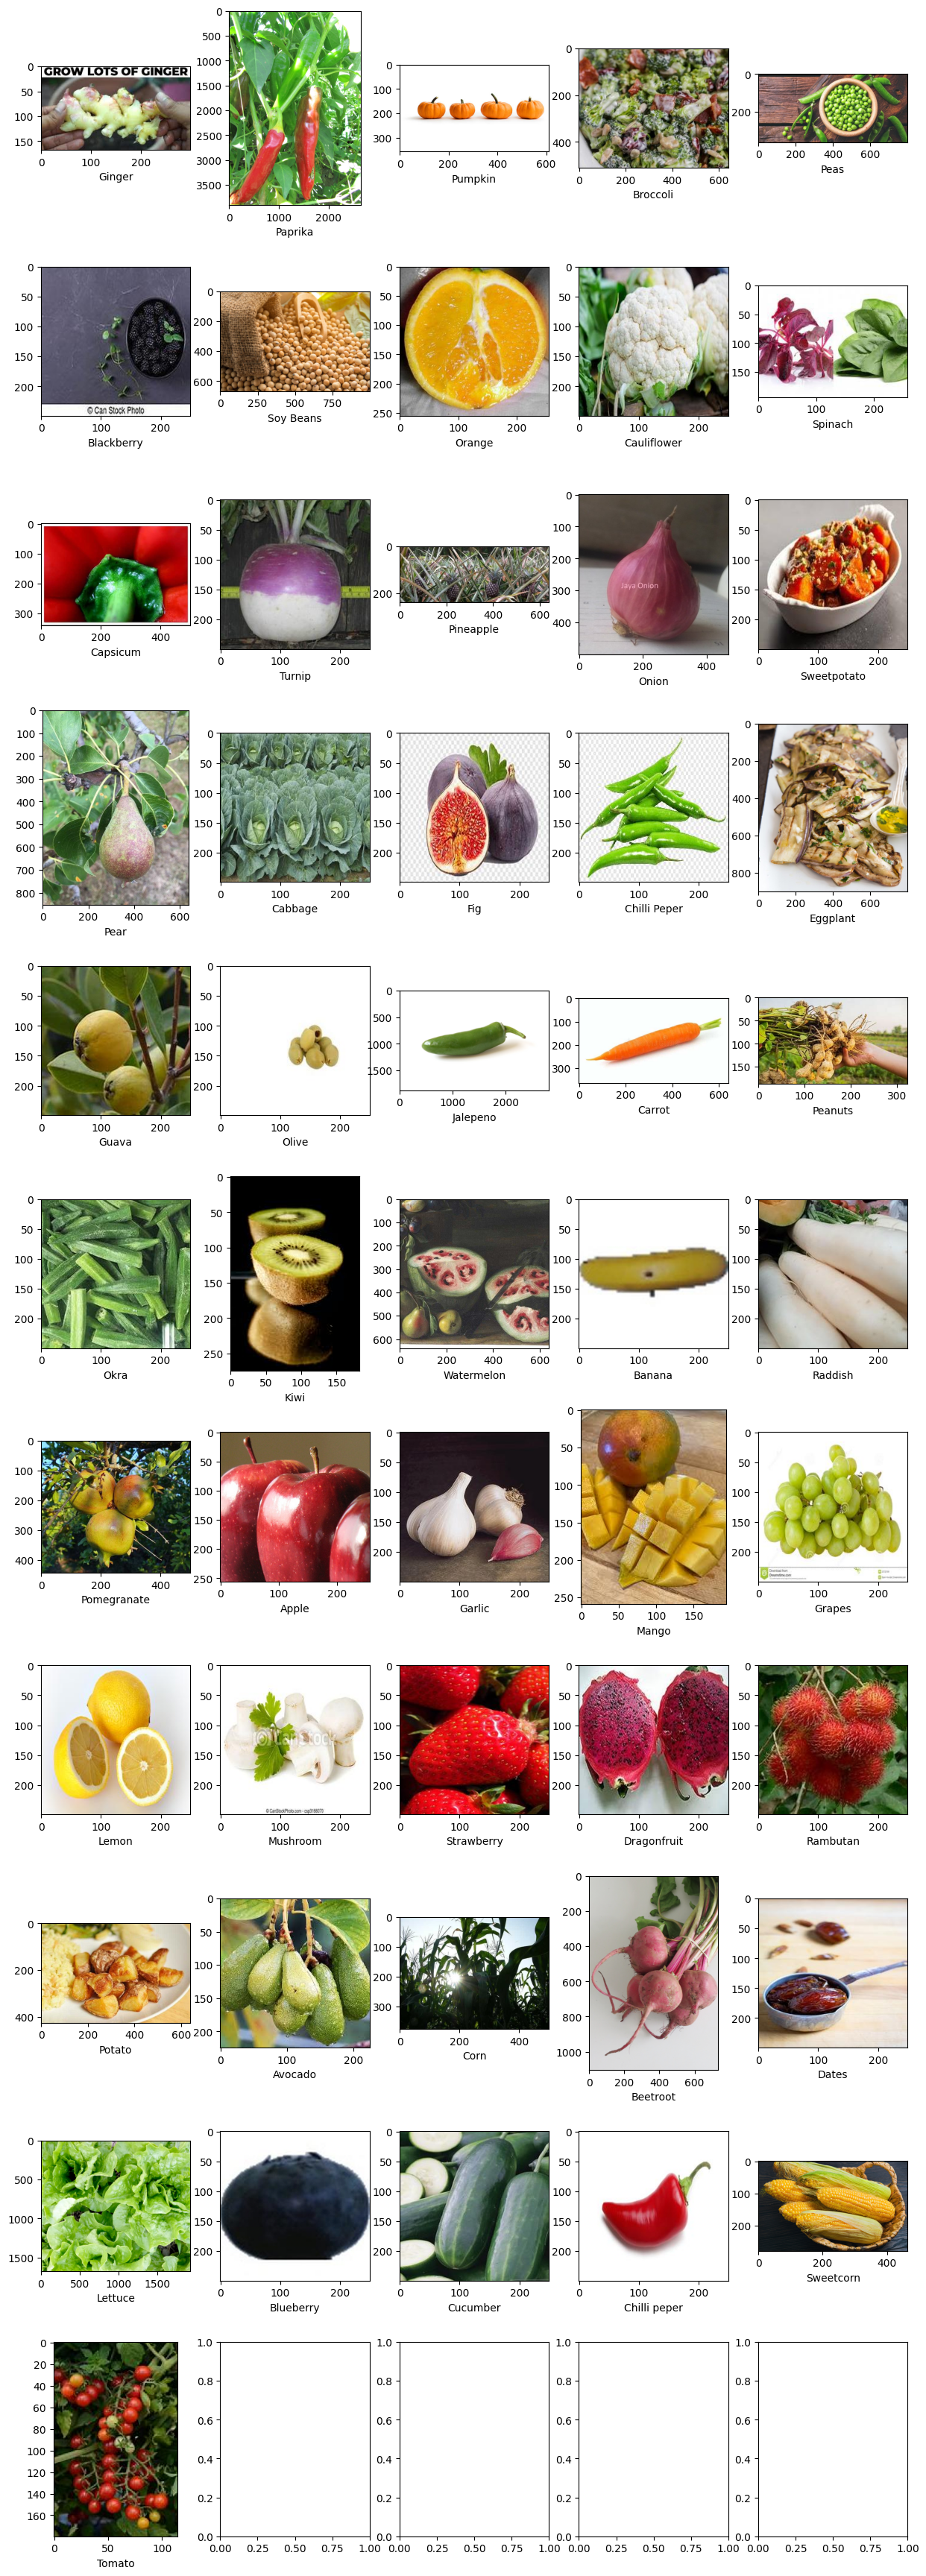

In [4]:
categories_path = [os.path.join(combined_dir, class_name) for class_name in os.listdir(combined_dir)]

ncols = 5
nrows = (len(os.listdir(combined_dir)) // 5) + 1
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
axs = axs.flatten()

i = 0
for category_path in categories_path:
    rand_img = np.random.choice(os.listdir(category_path))
    img = Image.open(os.path.join(category_path, rand_img)).convert('RGBA')
    axs[i].imshow(img)
    axs[i].set_xlabel(category_path.split('/')[-1])
    i += 1


## Check Unique Sizes and total images

In [5]:
def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0
 
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        # print(f"{subdir}: {num_images}")
        total_images += num_images
 
        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)

        # print("---------------")
        
    print(f"- {len(unique_sizes)} unique sizes")
    print(f"\nTotal: {total_images}")


print_images_resolution(combined_dir)

- 6660 unique sizes

Total: 49065


### Data Preprocessing

#### Split Dataset

## Modelling

## Evaluasi dan Visualisasi

## Konversi Model

## Inference (Optional)